In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random
import seaborn as sns
import math
import json

In [2]:
#Model Variables and Parameters
average_age=20
# Average ages in base year for underground and overhead distribution lines (in years)
age_shape=10
# We selected age shape and scale in a way that age_shape*age_scale=average_age
age_scale=2
# We selected age shape and scale in a way that age_shape*age_scale=average_age
length_shape=2
# We selected length shape and scale in a way that length_shape*length_age=average_length
length_scale=0.25
# We selected age shape and scale in a way that length_shape*age scale=average_length
average_length=0.5
# Average length for underground and overhead distribution lines (in miles)
segment_number= 625
# Numbers of line segments in the network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach segment's length is considered about 0.5 miles. So by dividing (91.5+121.7)/.5 we calculated this parameter.
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
overhead_baseyear=191
#Length of overhead lines in miles in base year
r=0.1
# Discount rate=10%
easment_value=3000
# per-acre price of a conservation easement
nfir=2100
# Non-fatality incidence rates, number of accidents per 100000 workers
fir=15
# Fatality incidence rates, number of accidents per 100000 workers
employees=8514/255
#The number of IOU employees
injurycost=130658
#A randomly determined annual injury cost, per accident
vsl=6900000
#The value of a statistical life
# change overhead corridor width to 72
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':72}
underground_line={'lifespan':40,'replcost':357000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':120,'over_under_raplcost':357000}
# the above two dictionaries shows related parameters for overhead and underground lines and the parameters are as follows:
#lifespan=Useful lifespan of overhead line and underground lines
#replcost=Cost associated with replacing a line with the same line type after it reaches its life span. 
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of line
# corridor_length= length of the corridor in feet needed for calculating environmental cost.
# over_under_raplcost= replacement cost associated with replacing an overhead line with an underground line.
###

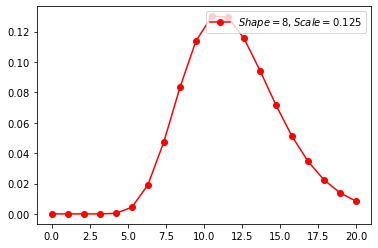

In [3]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, age_shape, age_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segment age

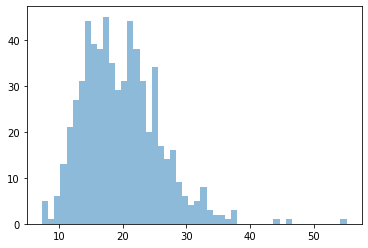

[32.33982307 19.83514345 41.19464777 15.09754286 15.03547992 18.79263533
 30.37923482 21.43692075 17.41597074 23.02568124 46.2841293  19.32676584
 19.73766843 17.43183593 22.42235881 15.04913369 17.85515924 15.37278134
 14.17027977 15.99194194 33.69659522 28.40049899 14.05935452 25.69950339
 19.57450375 15.90642945 23.01516248 10.45924038 15.82418808 12.12143095
 11.36428262 13.1280622  21.41897535 24.29279249 25.37100404 12.1919674
 17.31773162 19.97939772 15.87035652 11.41787458 19.44768901 12.59398134
 19.02320283 14.26364896 15.73784172 21.36358829 19.2563765   8.36972796
 21.77552197 13.68207969 14.86486082 23.3333409  16.34714079 23.84797756
 22.33820998 21.7781819  22.09843757 14.85992815 18.70419806 24.13605447
 15.63582324 13.77892994 12.64129305 18.83811922 18.98874205 18.15460029
 33.79613197 20.2932178  29.17966726 26.32531801 27.25692146 12.53992428
  9.87740176 21.31763653 30.46913051 20.71621292 23.23758994 21.10361786
 15.46890119 14.40872542 21.12285419 21.32906514 26.

In [4]:
age=np.random.gamma(age_shape,age_scale,segment_number)
plt.hist(np.random.gamma(age_shape,age_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined segment's ages in the base year

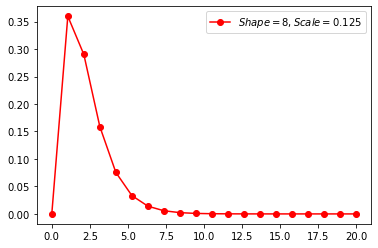

In [5]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, length_shape, length_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segments length
#length_shape*length_scale=average_length=0.5

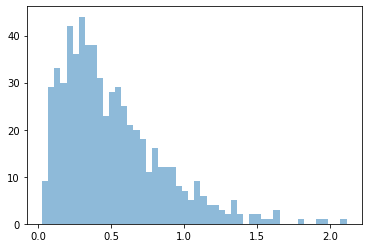

[0.15728315 0.52924423 0.54543135 0.2405599  0.91518186 0.28635794
 0.63904693 0.38701366 0.44073384 0.10755612 0.33438685 0.52303592
 0.12420844 0.73459353 0.62765689 0.94780483 0.26192779 0.66852363
 0.58492374 0.06570929 0.34738913 0.66148271 1.3139082  0.25757297
 0.13013535 0.34403247 0.26594843 0.74420235 0.28016266 0.15179482
 0.61834681 0.03655278 1.10540578 0.39278574 0.0756419  0.30094274
 1.04205284 0.3983288  0.39915583 0.37449825 0.28048963 0.64998042
 0.73323242 0.19823486 0.86956959 0.29471576 0.10225284 0.23311156
 0.76762495 0.20513703 0.04904515 0.35736178 0.40369334 0.28446512
 0.72669562 0.14509828 0.95395601 0.5177656  0.2918491  0.98330099
 0.63578513 0.49333614 0.25742179 0.40089803 0.47489922 0.47887419
 0.53495276 0.68198613 0.73126426 0.72136863 0.24429302 0.13922609
 0.67973154 0.25047055 0.45233221 0.13347031 0.72086846 0.19729821
 0.28212937 2.4952629  0.03519519 0.20454394 0.44656568 0.07142717
 0.54186527 0.60431049 1.10877561 0.3431254  1.05767253 1.1281

In [6]:
length=np.random.gamma(length_shape,length_scale,segment_number)
plt.hist(np.random.gamma(length_shape,length_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (length)
#Randomly determined circuit's ages in the base year

In [7]:
#Defining Line segment class with required attributes and methods and these methods are going to be modified based on requirements for each strategies in the simulations.
class Line_segment:
    ## The __init__ function as the constructor, which assigns random length, age and underground status for the base year to each line segment.
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[self.calculate_opex()]
        self.environmental_restoration=[]
    ###Lifecycle Infrastructure Costs:
    # Add one year to the age of line segment,compare it to the lifespan, starts from 1 when reaches to lifespan and append this age to age list. Also append underground status to its list.
    def update_age_and_underground_statusQuo(self):
        if self.underground[-1]==1:
            lifespan_current= int(underground_line['lifespan'])
        else:
            lifespan_current= int(overhead_line['lifespan'])
        age_current=self.age[-1]
        if age_current<(lifespan_current-1):
            age_current+=1
            self.age.append(age_current)
            self.underground.append(self.underground[0])
        else:
            self.age.append(1)
            self.underground.append(self.underground[0])
            
    def update_age_and_underground_under_after_lifespan(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    
    #Add interest rate to the replacement cost and also cansider different replacementcost rate when underground=1        
    def add_replcost_intrest_rate(self):
        underground_current=self.underground[-1]
        underground_baseyear=self.underground[0]
        if underground_current==1:
            replcost_growth_rate_current=underground_line['replcost_growth_rate']
        else:
            replcost_growth_rate_current=overhead_line['replcost_growth_rate']
        if underground_current==underground_baseyear:        
            replcost_new=(self.replcost_rate[-1])+((replcost_growth_rate_current)*(self.replcost_rate[-1]))
            self.replcost_rate.append(replcost_new)
        else:
            replcost_new=underground_line['replcost']*((1+replcost_growth_rate_current)**(len(self.underground)-1))
            self.replcost_rate.append(replcost_new)
        return(self.replcost_rate)
    
    #Determine capital expenses which is replacement cost for each line segment based on the rate of replacement cost in that year and length of the circuit.
    def calculate_capex(self):
        if (self.age[-1])==1:
            length_current=self.length
            replcost_rate_current=self.replcost_rate[-1]
            replcost_new=(replcost_rate_current)*(length_current)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    
    #Determin operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def calculate_opex(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_percentage_replcost_current=underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost_current=overhead_line['om_percentage_replcost']
        length_current=self.length
        replcost_rate_current=self.replcost_rate[-1]
        opex=(om_percentage_replcost_current)*(length_current)*(replcost_rate_current)
        #opex_new=opex[-1]+om_growth_rate*opex[-1]
        #self.opex.append(opex)
        return(opex)
    
    #Add interest rate to opex.
    def add_opex_interest_rate(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_growth_rate=underground_line['om_growth_rate']
        else:
            om_growth_rate=overhead_line['om_growth_rate']
        opex_new=self.opex[-1]+(self.opex[-1]*om_growth_rate)
        self.opex.append(opex_new)
        return(self.opex)

    #Determin the first retirement year
    def determine_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
 
    ###Environmental Costs:
    #Determin environmental restoration cost based on the length of overhead and underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    def calculate_environmental_restoration(self):
        environmental_restoration_current=0
        if self.underground[-1]==1:
            if self.underground[0]==1:
                corridor_length=overhead_line['corridor_length']
                self.environmental_restoration.append(environmental_restoration_current)
            else:
                corridor_length=underground_line['corridor_length']-overhead_line['corridor_length']
                environmental_restoration_current=((self.length)*(corridor_length)*640/5280*easment_value)
                self.environmental_restoration.append(environmental_restoration_current)
        else:
            corridor_length=underground_line['corridor_length']
            self.environmental_restoration.append(environmental_restoration_current)
        return(self.environmental_restoration)

    
    ###Safety and health Costs:
    #Return fatal cost which is one element of safety cost
    def calculate_non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    
    #Return non-fatal cost which is one element of safety cost
    def calculate_fatal_cost(self):
        return(fir*employees/100000*vsl)

In [8]:
#run simulation for calculating cost elemnts of statusQuo strategy and assign a data frame to them.
def run_cost_simulation_statusQuo_strategy(years_of_analysis):
    global df_line_segment_array
    global df_cost_line_segment_statusQuo
    global net_present_value_statusQuo
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_statusQuo()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array[t]+line_segment_fatal_cost_array[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_statusQuo=pd.DataFrame([range(years_of_analysis), line_segment_underground_length_total_array,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array,line_segment_non_fatal_cost_array,line_segment_fatal_cost_array,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_statusQuo.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_statusQuo['year'] = df_cost_line_segment_statusQuo['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_statusQuo_strategy_cost=[]
    for index, row in df_cost_line_segment_statusQuo.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_statusQuo_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_statusQuo_strategy_cost)
    net_present_value_statusQuo=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    net_present_value_statusQuo.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    #print(df_line_segment_array)
    #print(net_present_value_statusQuo)
    #print(df_cost_line_segment_statusQuo)

In [9]:
run_cost_simulation_statusQuo_strategy(40)

In [16]:
df_line_segment_array

,length,base year age,base year underground
0,0.225738,14.731749,1.0
1,0.393963,15.801804,1.0
2,0.230192,22.443022,0.0
3,1.338145,12.747211,1.0
4,0.730179,21.059207,1.0
...,...,...,...
620,0.094513,22.820023,0.0
621,0.446444,20.714079,0.0
622,0.897063,17.769020,0.0
623,0.465529,22.937441,1.0


In [17]:
df_cost_line_segment_statusQuo

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,226.0,0.000000e+00,3.063836e+05,3.063836e+05,0.0,91611.240988,34556.823529,126168.064518,4.325517e+05
1,1,0.0,1.765580e+05,3.217028e+05,4.982608e+05,0.0,91611.240988,34556.823529,126168.064518,6.244288e+05
2,2,0.0,0.000000e+00,3.377879e+05,3.377879e+05,0.0,91611.240988,34556.823529,126168.064518,4.639560e+05
3,3,0.0,0.000000e+00,3.546773e+05,3.546773e+05,0.0,91611.240988,34556.823529,126168.064518,4.808454e+05
4,4,0.0,1.828073e+05,3.724112e+05,5.552185e+05,0.0,91611.240988,34556.823529,126168.064518,6.813866e+05
5,5,0.0,1.374430e+05,3.910318e+05,5.284747e+05,0.0,91611.240988,34556.823529,126168.064518,6.546428e+05
6,6,0.0,1.138239e+06,4.105834e+05,1.548822e+06,0.0,91611.240988,34556.823529,126168.064518,1.674990e+06
7,7,0.0,6.476013e+05,4.311125e+05,1.078714e+06,0.0,91611.240988,34556.823529,126168.064518,1.204882e+06
8,8,0.0,1.621677e+05,4.526681e+05,6.148358e+05,0.0,91611.240988,34556.823529,126168.064518,7.410039e+05
9,9,0.0,6.664411e+05,4.753016e+05,1.141743e+06,0.0,91611.240988,34556.823529,126168.064518,1.267911e+06


In [18]:
net_present_value_statusQuo

,Net present value of lifecycle infrastructure cost,Net present value of environmental cost,Net present value of safety cost,Net present value of total statusQuo strategy cost
0,1.372778e+07,0.0,1.357184e+06,1.508496e+07


In [19]:
#run simulation for calculating cost elemnts of undergrounding after lifespan strategy and assign a data frame to them.
def run_cost_simulation_under_after_lifespan_strategy(years_of_analysis):
    global df_line_segment_array
    global df_cost_line_segment_under_after_lifespan
    global df_net_present_value_under_after_lifespan
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    environmental_restoration_cost=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    #underground_length_new=[]
    underground_total=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_under_after_lifespan()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
            line_segment_environmental_restoration_cost_array[t]+=line_segment_array[i].environmental_restoration[t] 
            
    #Generating underground length new array
    underground_length_new=[0 for t in range (years_of_analysis)]
    for i in range (len(line_segment_array)):
        first_retire=line_segment_array[i].determine_first_retire()
        length=line_segment_array[i].length
        if int(first_retire)>years_of_analysis-1:
            pass
        else:
            if line_segment_array[i].underground[0]==0:
                underground_length_new[int(first_retire)]+=length
            if line_segment_array[i].underground[0]==1:
                underground_length_new[int(first_retire)]+=0
    zipped_lists = zip(line_segment_underground_length_total_array,underground_length_new)
    underground_length_total = [x + y for (x, y) in zipped_lists]
    new_underground_length_total=[]
    cumsum=0
    for ele in underground_length_total:
        cumsum+=ele
        new_underground_length_total.append(cumsum)
    underground_increase_rate=[1]
    for i in range (1,  len(new_underground_length_total)):
        devided= ((new_underground_length_total[i])/(new_underground_length_total[i-1]))
        underground_increase_rate.append(devided)
    line_segment_environmental_restoration_cost_array_multiply_new_under=[]
    for num1, num2 in zip(line_segment_environmental_restoration_cost_array, underground_length_new):
        line_segment_environmental_restoration_cost_array_multiply_new_under.append(num1 * num2)      
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array_under=[]
    for num1, num2 in zip(line_segment_non_fatal_cost_array, underground_increase_rate):
        line_segment_non_fatal_cost_array_under.append(num1 * num2)
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array_under=[]
    for num1, num2 in zip(line_segment_fatal_cost_array, underground_increase_rate):
        line_segment_fatal_cost_array_under.append(num1 * num2)
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array_under[t]+line_segment_fatal_cost_array_under[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array_multiply_new_under[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_under_after_lifespan=pd.DataFrame([range(years_of_analysis), new_underground_length_total,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array_multiply_new_under,line_segment_non_fatal_cost_array_under,line_segment_fatal_cost_array_under,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_under_after_lifespan.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_under_after_lifespan['year'] = df_cost_line_segment_under_after_lifespan['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_under_after_lifespan_strategy_cost=[]
    for index, row in df_cost_line_segment_under_after_lifespan.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_under_after_lifespan_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_under_after_lifespan_strategy_cost)
    df_net_present_value_under_after_lifespan=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    df_net_present_value_under_after_lifespan.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    print (total_total)
    #print(df_line_segment_array)
    #print(df_cost_line_segment_under_after_lifespan)
    #print(df_net_present_value_under_after_lifespan)

In [20]:
run_cost_simulation_under_after_lifespan_strategy(40)

17502279.474550765


In [21]:
df_line_segment_array

,length,base year age,base year underground
0,0.225738,14.731749,1.0
1,0.393963,15.801804,1.0
2,0.230192,22.443022,0.0
3,1.338145,12.747211,1.0
4,0.730179,21.059207,1.0
...,...,...,...
620,0.094513,22.820023,0.0
621,0.446444,20.714079,0.0
622,0.897063,17.769020,0.0
623,0.465529,22.937441,1.0


In [22]:
df_cost_line_segment_under_after_lifespan

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,213.000000,0.000000e+00,3.028148e+05,3.028148e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,4.289829e+05
1,1,213.000000,1.352234e+05,3.179555e+05,4.531789e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.793470e+05
2,2,213.000000,4.604595e+04,3.338533e+05,3.798993e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.060673e+05
3,3,213.000000,0.000000e+00,3.505460e+05,3.505460e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,4.767140e+05
4,4,213.000000,4.291119e+05,3.680733e+05,7.971852e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,9.233533e+05
5,5,213.000000,5.046064e+05,3.864769e+05,8.910833e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,1.017251e+06
6,6,213.000000,0.000000e+00,4.058008e+05,4.058008e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.319688e+05
7,7,213.000000,3.318446e+05,4.260908e+05,7.579355e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,8.841035e+05
8,8,213.000000,2.681199e+05,4.473954e+05,7.155153e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,8.416834e+05
9,9,213.000000,1.459029e+06,4.697651e+05,1.928794e+06,0.000000e+00,91611.240988,34556.823529,126168.064518,2.054962e+06


In [23]:
df_net_present_value_under_after_lifespan

,Net present value of lifecycle infrastructure cost,Net present value of environmental cost,Net present value of safety cost,Net present value of total statusQuo strategy cost
0,1.384298e+07,2.300190e+06,1.359112e+06,1.750228e+07
